# Retail Sales, Amazon Purchases, and Covid-19

This notebook will explore three datasets to evaluate the trends in online shopping before and during the pandemic. The first dataset explores the retail sales by industry in the U.S. The second dataset looks at most popular product categories on Amazon. My analysis will compare these retail trends with the trends in Covid-19 cases in the United States.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
retail_data = pd.read_csv('../data/retail_sales_data.csv')

## Which industries were most positively and negatively affected by the pandemic?

The 'retail_data' dataset contains data on the monthly year-over-year retail sales development from January 2019 to August 2020. 

#### Look at size of `retail_data`

In [3]:
nrows, ncols = retail_data.shape

print(f'Retail data has {nrows} rows and {ncols} columns')

Retail data has 22 rows and 12 columns


This retail data set looks at 12 industries over 22 months, beginning in January 2019 and ending in August 2020.

#### Clean up data frame and drop unused columns and rows

In [4]:
retail_data

,"U.S. monthly year-over-year retail sales development from 2019 to 2020, by sector",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Monthly year-over-year retail sales developmen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Online and other non-store,Grocery and beverage stores,General merchandise stores,Health and personal care stores,Furniture and home furnishing stores,Sporting goods stores,Building materials and garden supply stores,Clothing and clothing accessory stores,Electronics and appliance stores,Total retail sales*,NaN
2,Jan 19,6.3,4,3.2,2.4,-2.5,-6.2,10.4,2.1,-3.2,3.6,in %
3,Feb 19,10.1,1.9,1.1,5.7,-2.7,-8.2,1.5,-0.5,-3.8,2.7,in %
4,Mar 19,9.2,-1.1,0.5,1.6,-1,-10.8,-0.7,-2.6,-4.1,0.8,in %
5,Apr 19,11.9,4.6,4.4,6.1,-0.7,-4.7,3.3,3.9,-3.4,5.2,in %
6,May 19,11.4,2.3,4.4,3.8,1.2,-2.4,-1.4,-2.4,-1.9,3.2,in %
7,Jun 19,11.6,2.1,2.3,3.4,1.7,-5.3,-4.7,-1.6,-5.8,2.3,in %
8,Jul 19,19.3,4,2.1,6.1,2,2,-0.5,-1.6,-2.3,5.6,in %
9,Aug 19,14.3,4.9,2.2,2.9,-0.1,3.8,-0.6,2.3,-2.9,4.6,in %


In [5]:
# drop the first row (with idx 0)
# use either inplace=True on the drop function 
# or a new pointer
retail_data2=retail_data.drop(0)

# drop the row with idx 13 - is there a reason to drop this month?
retail_data2=retail_data2.drop(13)

# drop the final column
retail_data2=retail_data2.drop(retail_data.columns[11], axis=1)

colnames = list(retail_data2.loc[1])
retail_data2.columns = ['month_year'] + colnames[1:]
retail_data2 = retail_data2[2:22]
retail_data2

,month_year,Online and other non-store,Grocery and beverage stores,General merchandise stores,Health and personal care stores,Furniture and home furnishing stores,Sporting goods stores,Building materials and garden supply stores,Clothing and clothing accessory stores,Electronics and appliance stores,Total retail sales*
3,Feb 19,10.1,1.9,1.1,5.7,-2.7,-8.2,1.5,-0.5,-3.8,2.7
4,Mar 19,9.2,-1.1,0.5,1.6,-1,-10.8,-0.7,-2.6,-4.1,0.8
5,Apr 19,11.9,4.6,4.4,6.1,-0.7,-4.7,3.3,3.9,-3.4,5.2
6,May 19,11.4,2.3,4.4,3.8,1.2,-2.4,-1.4,-2.4,-1.9,3.2
7,Jun 19,11.6,2.1,2.3,3.4,1.7,-5.3,-4.7,-1.6,-5.8,2.3
8,Jul 19,19.3,4,2.1,6.1,2,2,-0.5,-1.6,-2.3,5.6
9,Aug 19,14.3,4.9,2.2,2.9,-0.1,3.8,-0.6,2.3,-2.9,4.6
10,Sep 19,15.6,2.6,-0.2,4.2,1.1,0,2.5,-0.7,-1.7,4.5
11,Oct 19,14.6,4,1.9,1.7,1.6,0.4,-0.2,-1.7,-3,4.2
12,Nov 19,7.2,4,0,-1.7,1.4,4.3,-1.2,-2.9,-1.7,2.1


#### Rename Columns
- I renamed the columns to more succint titles.


In [6]:
col_name = {"month_year ": "Month", "Online and other non-store": "Online", "Grocery and beverage stores": "Grocery", "General merchandise stores": "General", "Health and personal care stores":"Health", "Furniture and home furnishing stores": "Furniture", "Sporting goods stores":"Sporting Goods", "Building materials and garden supply stores": "Landscaping", "Clothing and clothing accessory stores":"Clothing", "Electronics and appliance stores":"Electronic", "Total retail sales*":
            "Total Sales"}
retail_data2 = retail_data2.rename(columns=col_name)
retail_data2

,month_year,Online,Grocery,General,Health,Furniture,Sporting Goods,Landscaping,Clothing,Electronic,Total Sales
3,Feb 19,10.1,1.9,1.1,5.7,-2.7,-8.2,1.5,-0.5,-3.8,2.7
4,Mar 19,9.2,-1.1,0.5,1.6,-1,-10.8,-0.7,-2.6,-4.1,0.8
5,Apr 19,11.9,4.6,4.4,6.1,-0.7,-4.7,3.3,3.9,-3.4,5.2
6,May 19,11.4,2.3,4.4,3.8,1.2,-2.4,-1.4,-2.4,-1.9,3.2
7,Jun 19,11.6,2.1,2.3,3.4,1.7,-5.3,-4.7,-1.6,-5.8,2.3
8,Jul 19,19.3,4,2.1,6.1,2,2,-0.5,-1.6,-2.3,5.6
9,Aug 19,14.3,4.9,2.2,2.9,-0.1,3.8,-0.6,2.3,-2.9,4.6
10,Sep 19,15.6,2.6,-0.2,4.2,1.1,0,2.5,-0.7,-1.7,4.5
11,Oct 19,14.6,4,1.9,1.7,1.6,0.4,-0.2,-1.7,-3,4.2
12,Nov 19,7.2,4,0,-1.7,1.4,4.3,-1.2,-2.9,-1.7,2.1


#### Add a `DateTime` object version of the `month_year` column

* The `pd.to_datetime()` function creates a datetime object from a string or numeric column representing date.

* It gives some advantages for plotting and other analysis. So here we add a new column

In [7]:
retail_data2['date']=pd.to_datetime(retail_data2['month_year'], format="%b %y")

In [8]:
retail_data2.head()

,month_year,Online,Grocery,General,Health,Furniture,Sporting Goods,Landscaping,Clothing,Electronic,Total Sales,date
3,Feb 19,10.1,1.9,1.1,5.7,-2.7,-8.2,1.5,-0.5,-3.8,2.7,2019-02-01
4,Mar 19,9.2,-1.1,0.5,1.6,-1,-10.8,-0.7,-2.6,-4.1,0.8,2019-03-01
5,Apr 19,11.9,4.6,4.4,6.1,-0.7,-4.7,3.3,3.9,-3.4,5.2,2019-04-01
6,May 19,11.4,2.3,4.4,3.8,1.2,-2.4,-1.4,-2.4,-1.9,3.2,2019-05-01
7,Jun 19,11.6,2.1,2.3,3.4,1.7,-5.3,-4.7,-1.6,-5.8,2.3,2019-06-01


* Use it as the index

In [9]:
retail_data2=retail_data2.set_index('date')

In [10]:
retail_data2.head()

,month_year,Online,Grocery,General,Health,Furniture,Sporting Goods,Landscaping,Clothing,Electronic,Total Sales
date,,,,,,,,,,,
2019-02-01,Feb 19,10.1,1.9,1.1,5.7,-2.7,-8.2,1.5,-0.5,-3.8,2.7
2019-03-01,Mar 19,9.2,-1.1,0.5,1.6,-1,-10.8,-0.7,-2.6,-4.1,0.8
2019-04-01,Apr 19,11.9,4.6,4.4,6.1,-0.7,-4.7,3.3,3.9,-3.4,5.2
2019-05-01,May 19,11.4,2.3,4.4,3.8,1.2,-2.4,-1.4,-2.4,-1.9,3.2
2019-06-01,Jun 19,11.6,2.1,2.3,3.4,1.7,-5.3,-4.7,-1.6,-5.8,2.3


In [11]:
retail_data2.columns

Index(['month_year', 'Online', 'Grocery', 'General', 'Health', 'Furniture',
       'Sporting Goods', 'Landscaping', 'Clothing', 'Electronic',
       'Total Sales'],
      dtype='object')

In [12]:
retail_data2['Total Sales']

date
2019-02-01      2.7
2019-03-01      0.8
2019-04-01      5.2
2019-05-01      3.2
2019-06-01      2.3
2019-07-01      5.6
2019-08-01      4.6
2019-09-01      4.5
2019-10-01      4.2
2019-11-01      2.1
2020-01-01      2.7
2020-02-01      4.3
2020-03-01     -6.2
2020-04-01    -21.6
2020-05-01     -6.1
2020-06-01      9.3
2020-07-01       10
2020-08-01      5.6
Name: Total Sales, dtype: object

* Note the data type of the columns is an `object` (i.e. numeric data as a string) - this comes from the way the data was initially loaded when the first row was actually a heading - so could avoid by using skip rows or here we convert all those columns to `float`

#### Plot industry sales from March 2019 through July 2020

In [13]:
# drop month_year since we have datetime, drop total sales as it doesnt reflect individual industry performance
retail_data3=retail_data2.drop(columns=['month_year', 'Total Sales']).astype('float')

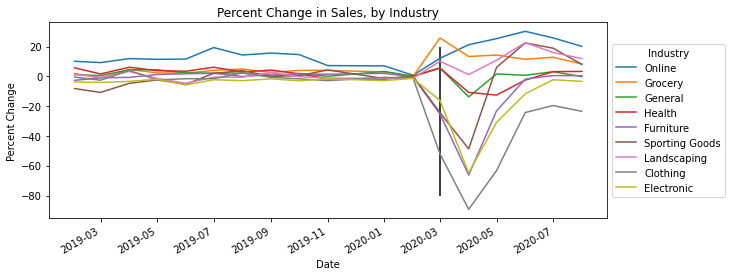

In [14]:
retail_data3.plot(figsize=(10,4), title="Percent Change in Sales, by Industry", ylabel= "Percent Change", xlabel="Date")
plt.vlines('2020-03', -80, 20, color="black")
plt.legend(loc='center left', title="Industry", bbox_to_anchor=(1.0, 0.5));

#### Plot trends of top two industries and bottom two industries

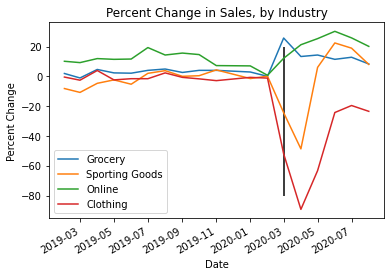

In [15]:
cols_to_use = ['Grocery', 'Sporting Goods', 'Online', 'Clothing']

retail_data3[cols_to_use].plot(ylabel="Percent Change", xlabel="Date", title = "Percent Change in Sales, by Industry")
plt.vlines('2020-03', -80, 20, color="black")

### Observations

#### Which industries thrived during the pandemic?

The top industries throughout the pandemic were online stores, grocery stores, and building material and garden supply stores. 


#### Why did they thrive?

Grocery store sales peaked around April, which makes sense as people were working from home, thus able to cook more, and many restaurants closed in response to the pandemic.

The peak in online store sales also makes sense as many physical stores shifted to an online business model to stay afloat despite the pandemic. One example is with virtual workout classes. 


#### Which industries were most hurt?

The industries most hurt by the pandemic were clothing stores, electronics stores, and furniture stores.

The pandemic hit the U.S in full force in March 2020, and shortly after sporting goods stores saw a drastic decline in sales. 

#### Why did this happen?

The sporting goods decrease is interesting -- on one hand people were exercising more and turning to the outdoors, such as activities like tennis and hiking. On the other hand, people were definitely avoiding contact sports and high school/college sports had their seasons canceled.

The decrease in clothing stores sales as they were all considered non-essential businesses and shut down. Trying on clothes is inherently risky so they are still struggling to recover despite stores reopening. 

## Which months were best/worst for certain industries?


Examine which months industries had the worst performance

In [16]:
# for all industries
retail_data3.idxmin()

Online           2020-02-01
Grocery          2019-03-01
General          2020-04-01
Health           2020-05-01
Furniture        2020-04-01
Sporting Goods   2020-04-01
Landscaping      2019-06-01
Clothing         2020-04-01
Electronic       2020-04-01
dtype: datetime64[ns]

Examine which months industries had the best performance

In [17]:
retail_data3.idxmax()

Online           2020-06-01
Grocery          2020-03-01
General          2020-03-01
Health           2019-04-01
Furniture        2019-07-01
Sporting Goods   2020-06-01
Landscaping      2020-06-01
Clothing         2019-04-01
Electronic       2020-02-01
dtype: datetime64[ns]

## How did the trends in top performing industries evolve with rising Covid-19 cases?

#### Look at size of Covid dataset

In [18]:
covid_data = pd.read_csv('../data/covid_data.csv')
nrows, ncols = covid_data.shape

print(f'Covid data has {nrows} rows and {ncols} columns')

Covid data has 296 rows and 2 columns


#### Sample the most recent data

In [19]:
covid_data.tail(30)

,Date,Number of Cases
266,October 14,"46,308"
267,October 15,"46,309"
268,October 16,"59,106"
269,October 17,"63,044"
270,October 18,"69,834"
271,October 19,"52,508"
272,October 20,"46,378"
273,October 21,"59,018"
274,October 22,"60,155"
275,October 23,"63,361"


In [20]:
# 1. create a datetime index
# 2. change number of cases into an integer

In [21]:
covid_data.columns

Index(['Date', 'Number of Cases'], dtype='object')

In [22]:
covid_data['date_str']=covid_data['Date'].str.replace('^(\w{3}).* (\d{1,2})$','\\1 \\2 2020').str.replace(' (\d) 2020',' 0\\1 2020')

In [23]:
covid_data['date_str']

0      Jan 22 2020
1      Jan 23 2020
2      Jan 24 2020
3      Jan 25 2020
4      Jan 26 2020
          ...     
291    Nov 08 2020
292    Nov 09 2020
293    Nov 10 2020
294    Nov 11 2020
295    Nov 12 2020
Name: date_str, Length: 296, dtype: object

In [24]:
covid_data['date_str'].unique()

array(['Jan 22 2020', 'Jan 23 2020', 'Jan 24 2020', 'Jan 25 2020',
       'Jan 26 2020', 'Jan 27 2020', 'Jan 28 2020', 'Jan 29 2020',
       'Jan 30 2020', 'Jan 31 2020', 'Feb 01 2020', 'Feb 02 2020',
       'Feb 03 2020', 'Feb 04 2020', 'Feb 05 2020', 'Feb 06 2020',
       'Feb 07 2020', 'Feb 08 2020', 'Feb 09 2020', 'Feb 10 2020',
       'Feb 11 2020', 'Feb 12 2020', 'Feb 13 2020', 'Feb 14 2020',
       'Feb 15 2020', 'Feb 16 2020', 'Feb 17 2020', 'Feb 18 2020',
       'Feb 19 2020', 'Feb 20 2020', 'Feb 21 2020', 'Feb 22 2020',
       'Feb 23 2020', 'Feb 24 2020', 'Feb 25 2020', 'Feb 26 2020',
       'Feb 27 2020', 'Feb 28 2020', 'Feb 29 2020', 'Mar 01 2020',
       'Mar 02 2020', 'Mar 03 2020', 'Mar 04 2020', 'Mar 05 2020',
       'Mar 06 2020', 'Mar 07 2020', 'Mar 08 2020', 'Mar 09 2020',
       'Mar 10 2020', 'Mar 11 2020', 'Mar 12 2020', 'Mar 13 2020',
       'Mar 14 2020', 'Mar 15 2020', 'Mar 16 2020', 'Mar 17 2020',
       'Mar 18 2020', 'Mar 19 2020', 'Mar 20 2020', 'Mar 21 20

We need to convert the daily cases into monthly cases.

In [25]:
covid_data=covid_data.set_index(pd.to_datetime(covid_data['date_str']))

In [26]:
covid_data = covid_data.rename(columns={'Number of Cases': 'Cases'})

In [27]:
covid_data['Cases']=covid_data['Cases'].str.replace(',','').astype('int')

In [28]:
covid_by_month = covid_data.resample('M')['Cases'].sum().to_frame()

In [29]:
covid_by_month

,Cases
date_str,
2020-01-31,6
2020-02-29,55
2020-03-31,140574
2020-04-30,863334
2020-05-31,730066
2020-06-30,803596
2020-07-31,1850930
2020-08-31,1510938
2020-09-30,1177511


<AxesSubplot:title={'center':'Covid-19 Cases in the United States'}, xlabel='Month (2020)', ylabel='Cases (in millions)'>

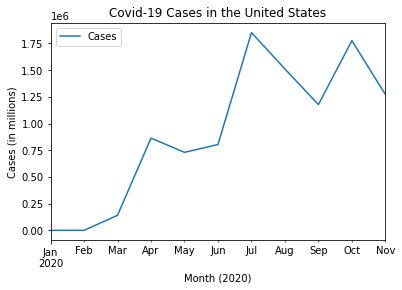

In [30]:
covid_by_month.plot(xlabel="Month (2020)", ylabel="Cases (in millions)", title="Covid-19 Cases in the United States")

In [31]:
covid_by_month.index = covid_by_month.index + pd.DateOffset(days=1)

In [32]:
covid_by_month

,Cases
date_str,
2020-02-01,6
2020-03-01,55
2020-04-01,140574
2020-05-01,863334
2020-06-01,730066
2020-07-01,803596
2020-08-01,1850930
2020-09-01,1510938
2020-10-01,1177511


Now, we can aggregate the covid cases data with the retail sales dataset to plot them against each other.

In [33]:
retail_data3

,Online,Grocery,General,Health,Furniture,Sporting Goods,Landscaping,Clothing,Electronic
date,,,,,,,,,
2019-02-01,10.1,1.9,1.1,5.7,-2.7,-8.2,1.5,-0.5,-3.8
2019-03-01,9.2,-1.1,0.5,1.6,-1.0,-10.8,-0.7,-2.6,-4.1
2019-04-01,11.9,4.6,4.4,6.1,-0.7,-4.7,3.3,3.9,-3.4
2019-05-01,11.4,2.3,4.4,3.8,1.2,-2.4,-1.4,-2.4,-1.9
2019-06-01,11.6,2.1,2.3,3.4,1.7,-5.3,-4.7,-1.6,-5.8
2019-07-01,19.3,4.0,2.1,6.1,2.0,2.0,-0.5,-1.6,-2.3
2019-08-01,14.3,4.9,2.2,2.9,-0.1,3.8,-0.6,2.3,-2.9
2019-09-01,15.6,2.6,-0.2,4.2,1.1,0.0,2.5,-0.7,-1.7
2019-10-01,14.6,4.0,1.9,1.7,1.6,0.4,-0.2,-1.7,-3.0


In [34]:
retail_covid_data = pd.merge(retail_data3,
         covid_by_month,
         left_index=True,
         right_index=True
        )

In [35]:
retail_covid_data

,Online,Grocery,General,Health,Furniture,Sporting Goods,Landscaping,Clothing,Electronic,Cases
2020-02-01,0.7,0.0,0.0,0.0,-0.4,0.1,-1.3,-1.2,-1.4,6
2020-03-01,12.1,25.7,5.7,5.5,-25.2,-24.4,10.1,-52.0,-16.2,55
2020-04-01,21.2,13.3,-13.8,-10.8,-66.3,-48.7,1.2,-89.3,-64.8,140574
2020-05-01,25.3,14.3,1.6,-12.6,-23.2,6.0,10.8,-63.3,-30.9,863334
2020-06-01,30.2,11.4,0.7,-2.5,-1.9,22.4,22.6,-24.3,-11.7,730066
2020-07-01,25.8,12.8,3.1,3.1,0.5,18.9,16.0,-19.6,-2.3,803596
2020-08-01,20.1,8.3,-0.2,3.3,0.4,8.0,11.9,-23.5,-3.4,1850930


We only want the online sales column and the cases column.

In [36]:
col_list = ['Online', 'Cases']
retail_covid_data = retail_covid_data[col_list]
retail_covid_data

,Online,Cases
2020-02-01,0.7,6
2020-03-01,12.1,55
2020-04-01,21.2,140574
2020-05-01,25.3,863334
2020-06-01,30.2,730066
2020-07-01,25.8,803596
2020-08-01,20.1,1850930


Now we can plot the number of covid cases and % change in online sales with a double-plot.

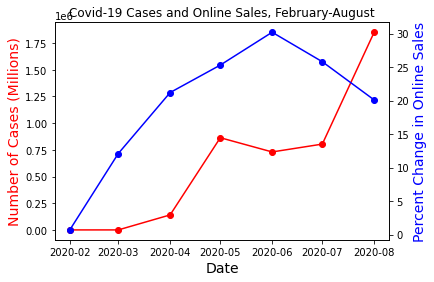

In [37]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(retail_covid_data.Cases, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Number of Cases (Millions)",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(retail_covid_data.Online,color="blue",marker="o")

# set labels 
ax2.set_ylabel("Percent Change in Online Sales",color="blue",fontsize=14)
ax2.set_title("Covid-19 Cases and Online Sales, February-August")
plt.show()
# save the plot as a file
fig.savefig('onlinesales_covid.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')

Here we see a fairly positive relationship between online sales and covid cases. However, when online sales peaked in June, Covid was not at its highest. Covid peaked in August in this plot, whereas online sales were on the decline at thsi point. 